In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe
from quantecon.markov import DiscreteDP
from numba import jit
from scipy.stats import norm

## Q1 (a)

In [4]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
print(z_grid)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
            

print(b)
print(np.exp(z_grid))

[-0.3   -0.225 -0.15  -0.075  0.     0.075  0.15   0.225  0.3  ]
[[3.52805842e-02 1.18091475e-01 2.53397008e-01 3.02191106e-01
  2.00357192e-01 7.37963542e-02 1.50732903e-02 1.70313471e-03
  1.09855133e-04]
 [2.04690973e-02 8.37373046e-02 2.14354009e-01 3.04863406e-01
  2.41062359e-01 1.05927790e-01 2.58286367e-02 3.48664672e-03
  2.70750483e-04]
 [1.13032654e-02 5.63099151e-02 1.71986068e-01 2.91733854e-01
  2.75102216e-01 1.44200358e-01 4.19648527e-02 6.76624640e-03
  6.33224834e-04]
 [5.93671933e-03 3.59079082e-02 1.30879138e-01 2.64803013e-01
  2.97789168e-01 1.86176853e-01 6.46532749e-02 1.24480924e-02
  1.40583226e-03]
 [2.96390859e-03 2.17123197e-02 9.44590725e-02 2.27984995e-01
  3.05759408e-01 2.27984995e-01 9.44590725e-02 2.17123197e-02
  2.96390859e-03]
 [1.40583226e-03 1.24480924e-02 6.46532749e-02 1.86176853e-01
  2.97789168e-01 2.64803013e-01 1.30879138e-01 3.59079082e-02
  5.93671933e-03]
 [6.33224834e-04 6.76624640e-03 4.19648527e-02 1.44200358e-01
  2.75102216e-01 2.91

## Q1 (b):
Primeira parte é uma tentativa mais elegante, o segundo bloco é mais 'braçal'

In [17]:
a_size=201
valor = np.zeros((1,a_size))
print(valor[:,1])

[0.]


[-1.    -0.975 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775
 -0.75  -0.725 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525
 -0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475
  0.5    0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725
  0.75   0.775  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975
  1.     1.025  1.05   1.075  1.1    1.125  1.15   1.175  1.2    1.225
  1.25   1.275  1.3    1.325  1.35   1.375  1.4    1.425  1.45   1.475
  1.5    1.525  1.55   1.575  1.6    1.625  1.65   1.675  1.7    1.725
  1.75   1.775  1.8    1.825  1.85   1.875  1.9    1.925  1.95   1.975
  2.     2.025  2.05   2.075  2.1    2.125  2.15   2.175  2.2    2.225
  2.25   2.275  2.3    2.325  2.35   2.375  2.4    2.425  2.45   2.475
  2.5 

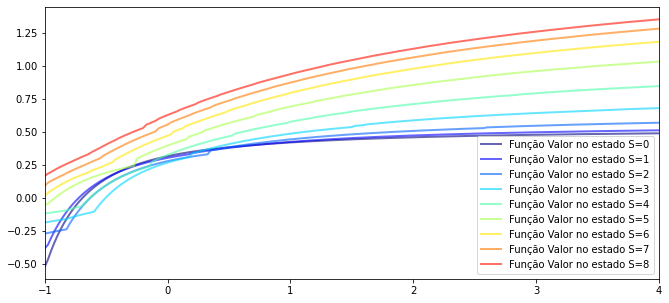

In [34]:
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
print(grid_a)
V_new = V_0
erro = 1
g = np.zeros((a_size, N))
while(erro > tol):
    V_old = V_new
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = start
            c_t = estoque - grid_a[t]
            if c_t >= 0:
                u = (c_t**(1-mu) - 1)/(1-mu)
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = esperanca + probabilidades[w]*V_old[t,w]
            valor[:,t] = u + beta*esperanca
            for t in range((start+1), a_size):
                c_t = estoque - grid_a[t]
                if c_t >= 0:
                    u = (c_t**(1-mu) - 1)/(1-mu)
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = u + beta*esperanca
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = valor[:,t-1]
                indice_a = t-1
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = valor[t]
                indice_a = t
            start = indice_a
            g[j,i] = grid_a[indice_a]
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
    print(erro)
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, V_new[:,i], color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Função Valor no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()


In [ ]:
#### NÃO RODAR!!!!!!!!!!
def maximize(g, a, b, args):
    """
    Maximizar a função g no intervalo [a, b].

    Note que apenas usamos o negativo da minimização de g.

    Retorna o valor maximo e o maximizador.
    """

    objective = lambda x: -g(x, *args)
    result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum

class ProbFamilias:
    """
        Comments on indexing: We need to enumerate the state space S as a sequence
    S = {0, ..., n}.  To this end, (a_i, s_i) index pairs are mapped to index
    indices according to the rule

        index = a_i * s_size + z_i

    To invert this map, use

        a_i = index // s_size  (integer division)
        s_i = index % s_size

    """


    def __init__(self,
                r=0.04,                      # Interest rate
                w=1,                       # Wages base multiplier, y=w*exp(z_t)
                beta=beta,                      # Discount factor
                phi=1
                a_min=-phi,
                mkvch=b,  # Markov chain
                s_vals=np.exp(z_grid),           # Exogenous states
                a_max=4,
                a_size=201):

        # Store values, set up grids over a and z
        self.r, self.w, self.beta = r, w, beta
        self.a_min, self.a_max, self.a_size = a_min, a_max, a_size

        self.mkvch = np.asarray(mkvch)
        self.s_vals = np.asarray(s_vals)
        self.s_size = len(s_vals)

        self.a_vals = np.linspace(a_min, a_max, a_size)
        self.n = a_size * self.s_size

        # Build the array Q
        self.Q = np.zeros((self.n, a_size, self.n))
        self.build_Q()

        # Build the array R
        self.R = np.empty((self.n, a_size))
        self.build_R()

    def set_prices(self, r, w):
        """
        Use this method to reset prices. Calling the method will trigger a
        re-build of R.
        """
        self.r, self.w = r, w
        self.build_R()

    def build_Q(self):
        populate_Q(self.Q, self.a_size, self.s_size, self.mkvch)

    def build_R(self):
        self.R.fill(-np.inf)
        populate_R(self.R,
                self.a_size,
                self.s_size,
                self.a_vals,
                self.s_vals,
                self.r,
                self.w)


# Do the hard work using JIT-ed functions


@jit(nopython=True)
def populate_R(R, a_size, s_size, a_vals, s_vals, r, w):
    n = a_size * s_size
    for index in range(n):
        a_i = index // s_size
        s_i = index % s_size
        a = a_vals[a_i]
        s = s_vals[s_i]
        for new_a_i in range(a_size):
            a_new = a_vals[new_a_i]
            c = w * s + (1 + r) * a - a_new
            if c > 0:
                R[index, new_a_i] = (c**(1-mu)-1)/(1-mu)  # Utility

@jit(nopython=True)
def populate_Q(Q, a_size, s_size, mkvch):
    n = a_size * s_size
    for index in range(n):
        s_i = index % s_size
        for a_i in range(a_size):
            for next_s_i in range(s_size):
                Q[index, a_i, a_i*s_size + next_s_i] = mkvch[index, index]


@jit(nopython=True)
def asset_marginal(s_probs, a_size, z_size):
    a_probs = np.zeros(a_size)
    for a_i in range(a_size):
        for s_i in range(s_size):
            a_probs[a_i] += s_probs[a_i*s_size + s_i]
    return a_probs
# Create an instance of Household
am = Household(r=r, w=w)
print(am.R)
# Use the instance to build a discrete dynamic program
am_ddp = DiscreteDP(am.R, am.Q, am.beta)

def T(v, og):
    """
    The Bellman operator.  Updates the guess of the value function
    and also computes a v-greedy policy.

      * og is an instance of OptimalGrowthModel
      * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)
    v_greedy = np.empty_like(v)

    for i in range(len(grid)):
        y = grid[i]

        # Maximize RHS of Bellman equation at state y
        c_star, v_max = maximize(og.state_action_value, 1e-10, y, (y, v))
        v_new[i] = v_max
        v_greedy[i] = c_star

    return v_greedy, v_new
# Solve using policy function iteration
def solve_model(og,
                tol=1e-6,
                max_iter=1000,
                verbose=True,
                print_skip=25):
    """
    Solve model by iterating with the Bellman operator.

    """

    # Set up loop
    v = og.u(og.grid)  # Initial condition
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_greedy, v_new = T(v, og)
        error = np.max(np.abs(v - v_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_greedy, v_new


# Simplify names
z_size, a_size = am.z_size, am.a_size
z_vals, a_vals = am.z_vals, am.a_vals
n = a_size * z_size

# Get all optimal actions across the set of a indices with z fixed in each row
a_star = np.empty((z_size, a_size))
for s_i in range(n):
    a_i = s_i // z_size
    z_i = s_i % z_size
    a_star[z_i, a_i] = a_vals[results.sigma[s_i]]

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(a_vals, a_vals, 'k--')  # 45 degrees
for i in range(z_size):
    lb = f'$z = {z_vals[i]:.2}$'
    ax.plot(a_vals, a_star[i, :], lw=2, alpha=0.6, label=lb)
    ax.set_xlabel('current assets')
    ax.set_ylabel('next period assets')
ax.legend(loc='upper left')

plt.show()
A = 1.0
N = 1.0
alpha = 0.33
beta = 0.96
delta = 0.05


def r_to_w(r):
    """
    Equilibrium wages associated with a given interest rate r.
    """
    return A * (1 - alpha) * (A * alpha / (r + delta))**(alpha / (1 - alpha))

def rd(K):
    """
    Inverse demand curve for capital.  The interest rate associated with a
    given demand for capital K.
    """
    return A * alpha * (N / K)**(1 - alpha) - delta


def prices_to_capital_stock(am, r):
    """
    Map prices to the induced level of capital stock.

    Parameters:
    ----------

    am : Household
        An instance of an aiyagari_household.Household
    r : float
        The interest rate
    """
    w = r_to_w(r)
    am.set_prices(r, w)
    aiyagari_ddp = DiscreteDP(am.R, am.Q, beta)
    # Compute the optimal policy
    results = aiyagari_ddp.solve(method='policy_iteration')
    # Compute the stationary distribution
    stationary_probs = results.mc.stationary_distributions[0]
    # Extract the marginal distribution for assets
    asset_probs = asset_marginal(stationary_probs, am.a_size, am.z_size)
    # Return K
    return np.sum(asset_probs * am.a_vals)


# Create an instance of ProbFamilias
amProbFamiliasrobFamilias()

# Use the instance to build a discrete dynamic program
am_ddp = DiscreteDP(am.R, am.Q, am.beta)

# Create a grid of r values at which to compute demand and supply of capital
num_points = 50
r_vals = np.linspace(0, 0.04, num_points)

# Compute supply of capital
k_vals = np.empty(num_points)
for i, r in enumerate(r_vals):
    k_vals[i] = prices_to_capital_stock(am, r)

# Plot against demand for capital by firms
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_vals, r_vals, lw=2, alpha=0.6, label='supply of capital')
ax.plot(k_vals, rd(k_vals), lw=2, alpha=0.6, label='demand for capital')
ax.grid()
ax.set_xlabel('capital')
ax.set_ylabel('interest rate')
ax.legend(loc='upper right')

plt.show()

In [19]:
help(DiscreteDP)

Help on class DiscreteDP in module quantecon.markov.ddp:

class DiscreteDP(builtins.object)
 |  DiscreteDP(R, Q, beta, s_indices=None, a_indices=None)
 |  
 |  Class for dealing with a discrete dynamic program.
 |  
 |  There are two ways to represent the data for instantiating a
 |  `DiscreteDP` object. Let n, m, and L denote the numbers of states,
 |  actions, and feasbile state-action pairs, respectively.
 |  
 |  1. `DiscreteDP(R, Q, beta)`
 |  
 |     with parameters:
 |  
 |     * n x m reward array `R`,
 |     * n x m x n transition probability array `Q`, and
 |     * discount factor beta,
 |  
 |     where `R[s, a]` is the reward for action `a` when the state is
 |     `s` and `Q[s, a, s_next]` is the probability that the state in the
 |     next period is `s_next` when the current state is `s` and the action
 |     chosen is `a`.
 |  
 |  2. `DiscreteDP(R, Q, beta, s_indices, a_indices)`
 |  
 |     with parameters:
 |  
 |     * length L reward vector `R`,
 |     * L x n tran